# Cameron Cischke DS Portfolio

## The Question

**What pitcher was the most valuable for the Detroit Tigers in 2023?**

The goal of this question is to determine which pitcher provided the most value for the Tigers in the past season in order to determine what players to prioritize in this offseason and beyond. As a General Manager, you only have so much money to spend on players, so it's important to know who you should be making sure you keep on your roster through the future. It's also just an interesting question. One of the best parts of sports is debating things like this with other fans, so this is my attempt to have a data-backed answer to the question for these types of discussions.

## Getting Data

I got my data from fangraphs.com, using their leaderboard feature to get the full-season data for all pitchers who threw any amount of innings in the tigers organization during the 2023 season.

In [57]:
# import necessary libraries
import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline  

In [58]:
pitchers = Table.read_table('tigers_pitchers.csv')
pitchers

Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,NameASCII,PlayerId,MLBAMID
Tarik Skubal,DET,7,3,0,15,15,80.1,11.4274,1.56847,0.448133,0.28877,0.6772,0.515957,0.0677966,95.8066,2.80083,2.28,1.99778,2.56476,3.28385,Tarik Skubal,22267,669373
Eduardo Rodriguez,DET,13,9,0,26,26,152.2,8.43011,2.82969,0.884278,0.274272,0.7595,0.410072,0.0967742,92.2943,3.3013,4.04,3.66115,4.06248,3.00055,Eduardo Rodriguez,13164,593958
Michael Lorenzen,DET,5,7,0,18,18,105.2,7.06938,2.29968,0.936906,0.264407,0.7212,0.421927,0.1,94.558,3.57728,nan,3.86072,4.22856,1.68927,Michael Lorenzen,14843,547179
Jason Foley,DET,3,3,7,70,0,69,7.17391,1.95652,0.26087,0.310345,0.7673,0.570732,0.0416667,98.1473,2.6087,3.79,2.7333,3.50665,1.5221,Jason Foley,19531,671345
Reese Olson,DET,5,7,0,21,18,103.2,8.94212,2.86495,1.21543,0.254613,0.6982,0.42807,0.134615,94.8319,3.99357,4.77,4.00745,3.91049,1.4759,Reese Olson,24968,681857
Will Vest,DET,2,1,2,48,4,48.1,10.4276,2.42069,0.55862,0.291339,0.7172,0.449612,0.0638298,95.3825,2.97931,3.02,2.55159,3.35244,1.15694,Will Vest,19769,676684
Tyler Holton,DET,3,2,1,59,1,85.1,7.80469,1.89844,0.949219,0.211712,0.8654,0.45614,0.111111,91.5797,2.10938,3.53,3.55973,3.75803,0.951774,Tyler Holton,26231,663947
Matthew Boyd,DET,5,5,0,15,15,71,9.25352,3.16901,1.39437,0.302083,0.6203,0.38806,0.126437,91.6431,5.4507,4.21,4.35363,4.36549,0.869286,Matthew Boyd,15440,571510
Matt Manning,DET,5,4,0,15,15,78,5.76923,2.42308,1.26923,0.213974,0.6941,0.386555,0.0990991,93.446,3.57692,5.48,4.80632,5.32584,0.613128,Matt Manning,20369,666159
Sawyer Gipson-Long,DET,1,0,0,4,4,20,11.7,3.6,0.9,0.26087,0.7813,0.354167,0.0869565,93.6357,2.7,2.5,3.15504,3.7564,0.500673,Sawyer Gipson-Long,26048,687830


The above table shows the raw data I got from Fangraphs. Since Fangraphs is awesome, it's already quite clean. However, this table holds some excess information that we don't really need for this analysis.

In [59]:
pitchers = pitchers.drop('NameASCII', 'PlayerId', 'MLBAMID')
pitchers

Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR
Tarik Skubal,DET,7,3,0,15,15,80.1,11.4274,1.56847,0.448133,0.28877,0.6772,0.515957,0.0677966,95.8066,2.80083,2.28,1.99778,2.56476,3.28385
Eduardo Rodriguez,DET,13,9,0,26,26,152.2,8.43011,2.82969,0.884278,0.274272,0.7595,0.410072,0.0967742,92.2943,3.3013,4.04,3.66115,4.06248,3.00055
Michael Lorenzen,DET,5,7,0,18,18,105.2,7.06938,2.29968,0.936906,0.264407,0.7212,0.421927,0.1,94.558,3.57728,nan,3.86072,4.22856,1.68927
Jason Foley,DET,3,3,7,70,0,69,7.17391,1.95652,0.26087,0.310345,0.7673,0.570732,0.0416667,98.1473,2.6087,3.79,2.7333,3.50665,1.5221
Reese Olson,DET,5,7,0,21,18,103.2,8.94212,2.86495,1.21543,0.254613,0.6982,0.42807,0.134615,94.8319,3.99357,4.77,4.00745,3.91049,1.4759
Will Vest,DET,2,1,2,48,4,48.1,10.4276,2.42069,0.55862,0.291339,0.7172,0.449612,0.0638298,95.3825,2.97931,3.02,2.55159,3.35244,1.15694
Tyler Holton,DET,3,2,1,59,1,85.1,7.80469,1.89844,0.949219,0.211712,0.8654,0.45614,0.111111,91.5797,2.10938,3.53,3.55973,3.75803,0.951774
Matthew Boyd,DET,5,5,0,15,15,71,9.25352,3.16901,1.39437,0.302083,0.6203,0.38806,0.126437,91.6431,5.4507,4.21,4.35363,4.36549,0.869286
Matt Manning,DET,5,4,0,15,15,78,5.76923,2.42308,1.26923,0.213974,0.6941,0.386555,0.0990991,93.446,3.57692,5.48,4.80632,5.32584,0.613128
Sawyer Gipson-Long,DET,1,0,0,4,4,20,11.7,3.6,0.9,0.26087,0.7813,0.354167,0.0869565,93.6357,2.7,2.5,3.15504,3.7564,0.500673


Also, a lot of these rows are rounded to way too many decimal places.

In [60]:
pitchers = pitchers.drop('K/9').with_column('K/9', pitchers.column('K/9').round(2))
pitchers = pitchers.drop('BB/9').with_column('BB/9', pitchers.column('BB/9').round(2))
pitchers = pitchers.drop('HR/9').with_column('HR/9', pitchers.column('HR/9').round(2))
pitchers = pitchers.drop('BABIP').with_column('BABIP', pitchers.column('BABIP').round(3))
pitchers = pitchers.drop('LOB%').with_column('LOB%', ((pitchers.column('LOB%') * 100).round(2)))
pitchers = pitchers.drop('GB%').with_column('GB%', (pitchers.column('GB%').round(3) * 100))
pitchers = pitchers.drop('HR/FB%').with_column('HR/FB', pitchers.column('HR/FB').round(3))
pitchers = pitchers.drop('vFA (pi)').with_column('vFA (pi)', pitchers.column('vFA (pi)').round(1))
pitchers = pitchers.drop('ERA').with_column('ERA', pitchers.column('ERA').round(2))
pitchers = pitchers.drop('xERA').with_column('xERA', pitchers.column('xERA').round(2))
pitchers = pitchers.drop('FIP').with_column('FIP', pitchers.column('FIP').round(2))
pitchers = pitchers.drop('xFIP').with_column('xFIP', pitchers.column('xFIP').round(2))
pitchers = pitchers.drop('WAR').with_column('WAR', pitchers.column('WAR').round(1))
pitchers

Name,Team,W,L,SV,G,GS,IP,HR/FB,K/9,BB/9,HR/9,BABIP,LOB%,GB%,vFA (pi),ERA,xERA,FIP,xFIP,WAR
Tarik Skubal,DET,7,3,0,15,15,80.1,0.068,11.43,1.57,0.45,0.289,67.72,51.6,95.8,2.8,2.28,2,2.56,3.3
Eduardo Rodriguez,DET,13,9,0,26,26,152.2,0.097,8.43,2.83,0.88,0.274,75.95,41,92.3,3.3,4.04,3.66,4.06,3
Michael Lorenzen,DET,5,7,0,18,18,105.2,0.1,7.07,2.3,0.94,0.264,72.12,42.2,94.6,3.58,nan,3.86,4.23,1.7
Jason Foley,DET,3,3,7,70,0,69,0.042,7.17,1.96,0.26,0.31,76.73,57.1,98.1,2.61,3.79,2.73,3.51,1.5
Reese Olson,DET,5,7,0,21,18,103.2,0.135,8.94,2.86,1.22,0.255,69.82,42.8,94.8,3.99,4.77,4.01,3.91,1.5
Will Vest,DET,2,1,2,48,4,48.1,0.064,10.43,2.42,0.56,0.291,71.72,45,95.4,2.98,3.02,2.55,3.35,1.2
Tyler Holton,DET,3,2,1,59,1,85.1,0.111,7.8,1.9,0.95,0.212,86.54,45.6,91.6,2.11,3.53,3.56,3.76,1
Matthew Boyd,DET,5,5,0,15,15,71,0.126,9.25,3.17,1.39,0.302,62.03,38.8,91.6,5.45,4.21,4.35,4.37,0.9
Matt Manning,DET,5,4,0,15,15,78,0.099,5.77,2.42,1.27,0.214,69.41,38.7,93.4,3.58,5.48,4.81,5.33,0.6
Sawyer Gipson-Long,DET,1,0,0,4,4,20,0.087,11.7,3.6,0.9,0.261,78.13,35.4,93.6,2.7,2.5,3.16,3.76,0.5


Finally, we need to remove players who threw a miniscule sample size of innings. You can't provide the most value to the team if you only threw 5 innings all year. I'm going to choose to cut it off at 50 innings.

In [61]:
pitchers = pitchers.where('IP', are.above_or_equal_to(50) )
pitchers

Name,Team,W,L,SV,G,GS,IP,HR/FB,K/9,BB/9,HR/9,BABIP,LOB%,GB%,vFA (pi),ERA,xERA,FIP,xFIP,WAR
Tarik Skubal,DET,7,3,0,15,15,80.1,0.068,11.43,1.57,0.45,0.289,67.72,51.6,95.8,2.8,2.28,2,2.56,3.3
Eduardo Rodriguez,DET,13,9,0,26,26,152.2,0.097,8.43,2.83,0.88,0.274,75.95,41,92.3,3.3,4.04,3.66,4.06,3
Michael Lorenzen,DET,5,7,0,18,18,105.2,0.1,7.07,2.3,0.94,0.264,72.12,42.2,94.6,3.58,nan,3.86,4.23,1.7
Jason Foley,DET,3,3,7,70,0,69,0.042,7.17,1.96,0.26,0.31,76.73,57.1,98.1,2.61,3.79,2.73,3.51,1.5
Reese Olson,DET,5,7,0,21,18,103.2,0.135,8.94,2.86,1.22,0.255,69.82,42.8,94.8,3.99,4.77,4.01,3.91,1.5
Tyler Holton,DET,3,2,1,59,1,85.1,0.111,7.8,1.9,0.95,0.212,86.54,45.6,91.6,2.11,3.53,3.56,3.76,1
Matthew Boyd,DET,5,5,0,15,15,71,0.126,9.25,3.17,1.39,0.302,62.03,38.8,91.6,5.45,4.21,4.35,4.37,0.9
Matt Manning,DET,5,4,0,15,15,78,0.099,5.77,2.42,1.27,0.214,69.41,38.7,93.4,3.58,5.48,4.81,5.33,0.6
Alex Faedo,DET,2,5,0,15,12,64.2,0.143,8.07,2.78,1.67,0.211,65.13,36.3,93,4.45,3.87,4.85,4.58,0.5
José Cisnero,DET,3,4,2,63,0,59.1,0.156,10.62,3.79,1.52,0.338,68.35,43.9,96,5.31,4.64,4.6,4.2,-0


Much better. Now we can start taking a look at the data and figure out what they say.

## Exploring the Data/Visualizing the Data

**ERA and Workload**

Earned Run Average (ERA) is the stat that has been used for a long time to measure pitcher performance. It's calculation is simply taking the number of runs a pitcher gave up (taking out any caused by defensive errors by his teammates), dividing it by the number of innings he pitched, and multiplying it by 9 (the number of innings in a game).

In [62]:
pitchers.select('Name','IP','ERA').sort('ERA')

Name,IP,ERA
Tyler Holton,85.1,2.11
Jason Foley,69,2.61
Tarik Skubal,80.1,2.8
Eduardo Rodriguez,152.2,3.3
Michael Lorenzen,105.2,3.58
Matt Manning,78,3.58
Alex Lange,66,3.68
Reese Olson,103.2,3.99
Alex Faedo,64.2,4.45
José Cisnero,59.1,5.31


Ok, so that should be it right? If a pitcher's job is to prevent runs, and Tyler Holton prevented the most runs per 9 innings he pitched, then he must be the most valuable, right?

Not exactly.

The most obvious issue with this is the difference in workload. Holton, Foley, and Skubal threw nearly half the innings of Eduardo Rodriguez, who had the lowest ERA of any pitcher who threw more than 100 innings.

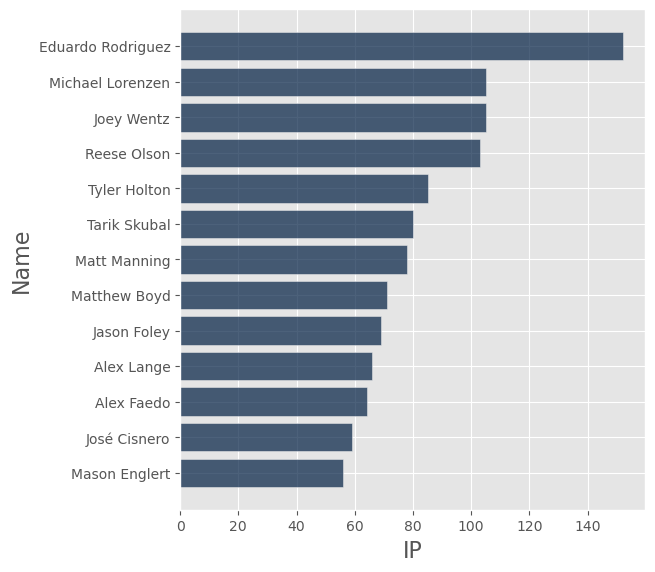

In [63]:
pitchers.select('Name','IP').sort('IP', descending = True).barh('Name')

That's not the only issue though. The others are harder to explain, and given my audience I won't get into them right now. Just know that ERA is a highly flawed statistic that relies heavily on luck, the defense behind the pitcher, and the subjective decisions of the official scorer. I prefer to use statistics that the pitchers actually have control over.

**K/9, BB/9, and HR/9**

Baseball has recently been shifting its focus more and more towards the three true outcomes of an at-bat: a walk, a strikeout, or a home run. These three outcomes are influenced by no one other than the pitcher and the hitter (except for a little bit of influence by the catcher, which is well outside of the scope of today's discussion). These three outcomes are measured by three stats.

In [64]:
pitchers.select('Name','IP','K/9','BB/9','HR/9')

Name,IP,K/9,BB/9,HR/9
Tarik Skubal,80.1,11.43,1.57,0.45
Eduardo Rodriguez,152.2,8.43,2.83,0.88
Michael Lorenzen,105.2,7.07,2.3,0.94
Jason Foley,69,7.17,1.96,0.26
Reese Olson,103.2,8.94,2.86,1.22
Tyler Holton,85.1,7.8,1.9,0.95
Matthew Boyd,71,9.25,3.17,1.39
Matt Manning,78,5.77,2.42,1.27
Alex Faedo,64.2,8.07,2.78,1.67
José Cisnero,59.1,10.62,3.79,1.52


Let's take a look at each of these in turn.

K/9 measures strikeouts per 9 innings pitched. Obviously, a higher strikeout rate is better for a pitcher.

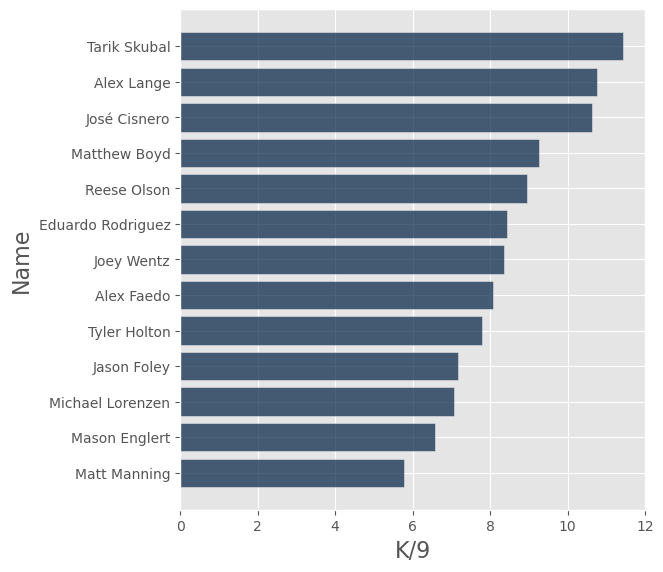

In [65]:
pitchers.select('Name','K/9').sort('K/9', descending = True ).barh('Name')

Tarik Skubal, Alex Lange, and Jose Cisnero head this list, with Skubal having a sizeable lead over everyone else in the field.

BB/9 measures walks per 9 innings pitched. Walks are bad for a pitcher since you are simply giving the opponent free baserunners, so this time we're looking for shorter bars on the graph.

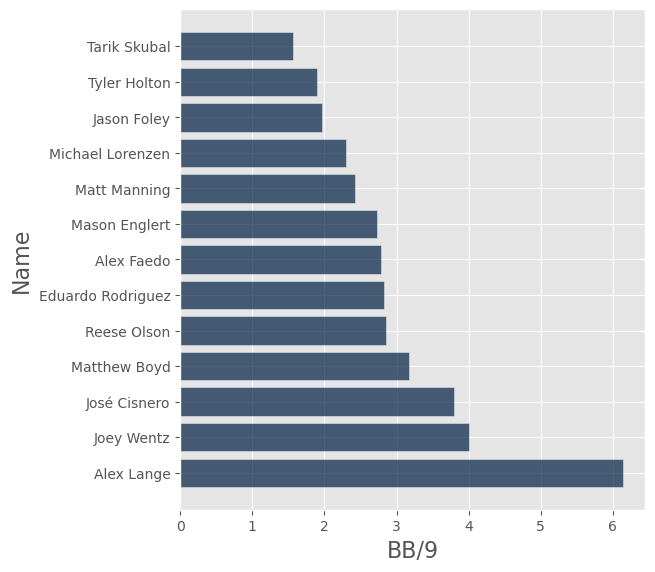

In [66]:
pitchers.select('Name','BB/9').sort('BB/9').barh('Name')

Skubal is once again at the top by a good margin, followed this time by Tyler Holton and Jason Foley.

HR/9 measures the number of home runs given up per 9 innings pitched. Obviously, home runs are very bad for a pitcher to give up so we are once again looking for a low HR/9.

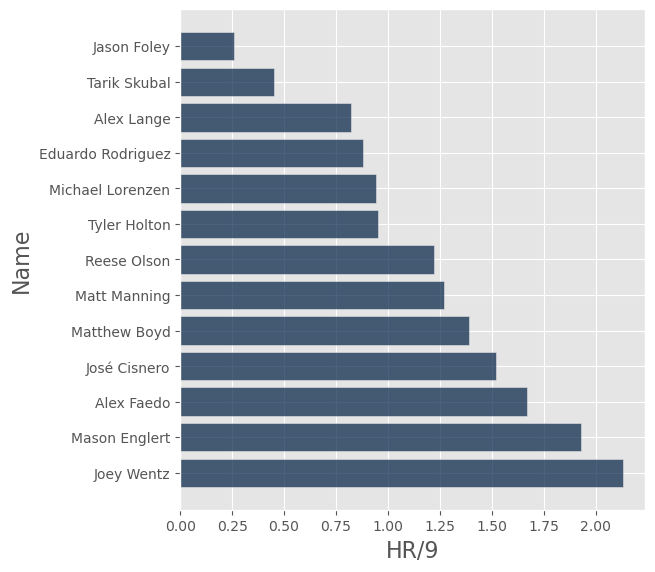

In [67]:
pitchers.select('Name','HR/9').sort('HR/9').barh('Name')

Jason Foley handily leads this list, followed by Skubal and then Alex Lange.

Tarik Skubal has been in the top three for each of these stats, leading two of them by a solid margin. Also note Eduardo Rodriguez has been in the middle of the pack or near the top in all of these stats, but never cracked the top three in any of them.

**I think we can narrow our search down to three pitchers: Eduardo Rodriguez and Tarik Skubal.**

In [68]:
top = pitchers.take(0,1)
top

Name,Team,W,L,SV,G,GS,IP,HR/FB,K/9,BB/9,HR/9,BABIP,LOB%,GB%,vFA (pi),ERA,xERA,FIP,xFIP,WAR
Tarik Skubal,DET,7,3,0,15,15,80.1,0.068,11.43,1.57,0.45,0.289,67.72,51.6,95.8,2.8,2.28,2,2.56,3.3
Eduardo Rodriguez,DET,13,9,0,26,26,152.2,0.097,8.43,2.83,0.88,0.274,75.95,41,92.3,3.3,4.04,3.66,4.06,3


The main argument for Rodriguez is his workload. He gave the Tigers nearly twice the innings that Skubal did, pitching quite well throughout those innings. Skubal inarguably pitched much better than Rodriguez, but was out with an injury for the first half of the season. If he had pitched a full season at the rate he pitched his 80 innings, this would not even be a discussion. But we're asking about the value of what *did* happen, not what could have happened. 

**As it stands, our question is this: Did Skubal pitch better enough than Rodriguez to make up for pitching only half the innings?**

It's time to bring a more complicated metric into the discussion. **Wins Above Replacement (WAR)** attempts to answer the very question we are asking in this study. It takes lots of other statistics and forms them into a construct that estimates the number of wins a given player brings to his team above a replacement (an average minor league player). I'm not going to explain how it's calculated (even if I wanted to I couldn't), and I will fully admit that it has flaws, but I am still a big fan and think it carries a lot of weight.
(I'm using the Fangraphs version of WAR since my data comes from Fangraphs and since I think it's slightly better than other versions for pitchers).

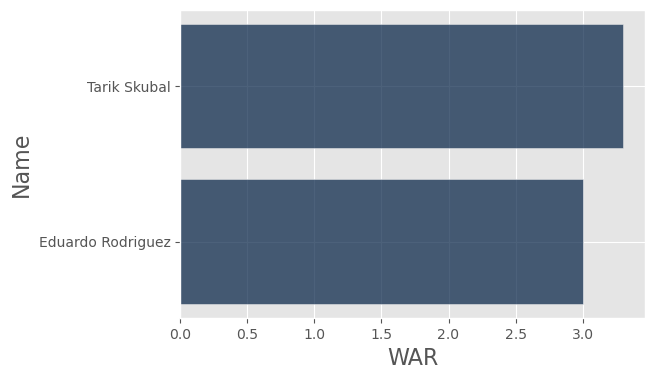

In [69]:
top.select('Name','WAR').barh('Name')

WAR says that Skubal's superior performance makes up for his lighter workload, and I agree.

## Conclusion

Tarik Skubal being the most valuable pitcher on the Tigers in 2023 is a great sign for the organization. He is a young pitcher who has come up through the Tiger's minor league system and has plenty of years of control remaining for the Tigers. If he puts up anything like these numbers over a full season next year, the Tigers should seriously consider giving him a large extension.